<a href="https://colab.research.google.com/github/VictorPLima/Projeto_Final_COCADA_2025-1/blob/main/Projeto_Final_COCADA-Victor_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background removal with PCA and segmentation of objects (in this case, people)

Aluno: Victor Pereira de Lima

DRE: 122178074

Other ideas with PCA:

- [DeepFake detection](https://www.kaggle.com/datasets/unidpro/deepfake-videos-dataset)
- [Vehicle Detection](https://www.kaggle.com/datasets/pkdarabi/vehicle-detection-image-dataset?select=SampleVideo_LowQuality.mp4)
- [Real Life Violence Situations detection](https://www.kaggle.com/datasets/mohamedmustafa/real-life-violence-situations-dataset)

    

In [1]:
import sys, os
import numpy as np
from PIL import Image

# import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
import moviepy.editor as mpe
from IPython.display import display
from glob import glob

  if event.key is 'enter':



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Funções

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def img_resize(img, percentage, image_mode, new_image_mode=False):
  # image_mode: 'L' (grayscale), 'RGB', 'CMYK'

  m, n = img.shape[:2]
  # print(f"initial shape: ({m}, {n})")

  img = Image.fromarray(img, image_mode)
  if(new_image_mode in ('L', 'RGB', 'CMYK') and new_image_mode!=image_mode):
    img = img.convert(new_image_mode)

  # Redimensionamento
  height, width = int(m*percentage/100), int(n*percentage/100)
  # print(f"resized shape ({percentage}%): ({height}, {width})")

  resized_image = img.resize((width, height))
  resized_image_array = np.asarray(resized_image)

  return resized_image, resized_image_array


def create_data_matrix_from_video(clip, fps=5, resize_percentage=50):
  # pega do clip fps frames/segundo, sendo estes redimensionados por resize_percentage

  return np.vstack([img_resize(clip.get_frame(i/float(fps)), resize_percentage, 'RGB', 'L')[1].flatten()
                    for i in range(fps * int(clip.duration))]).T


In [87]:
video = mpe.VideoFileClip("v1.mp4")
video.duration, video.fps

(50.0, 7.0)

In [88]:
video.subclip(0,int(video.duration)).ipython_display(width=300)


t:   2%|▏         | 25/1002 [20:21<02:25,  6.70it/s, now=None]

t:   0%|          | 3/1002 [03:49<00:50, 19.89it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4





t:   0%|          | 0/350 [00:00<?, ?it/s, now=None]

t:  13%|█▎        | 44/350 [00:00<00:00, 435.64it/s, now=None]

t:  31%|███       | 109/350 [00:00<00:00, 556.82it/s, now=None]

t:  50%|████▉     | 174/350 [00:00<00:00, 597.40it/s, now=None]

t:  67%|██████▋   | 234/350 [00:00<00:00, 597.66it/s, now=None]

t:  87%|████████▋ | 305/350 [00:00<00:00, 635.85it/s, now=None]


t:   2%|▏         | 25/1002 [20:21<02:25,  6.70it/s, now=None]

t:   0%|          | 3/1002 [03:50<00:50, 19.89it/s, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


[[143 146 149 ...  84  87  50]
 [145 144 148 ...  77  85  46]
 [142 143 144 ...  79  82  45]
 ...
 [ 38  42  43 ...  66  70  67]
 [ 38  38  42 ...  71  63  59]
 [ 38  37  40 ...  75  74  58]]


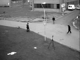

In [89]:
# Rascunho

v = video.get_frame(0)
# print(v.shape[:2])
v = v.copy()
v_int_matrix = v.astype(int)

# v[:,:,0], v[:,:,1] = np.zeros(v.shape[:2]), np.zeros(v.shape[:2])
# v

resized_img, resized_img_array = img_resize(v, 25, 'RGB', 'L')

print(resized_img_array)
display(resized_img)

In [90]:
print(img_resize(v, 25, 'RGB', 'L')[1].shape)
print(np.vstack([img_resize(v, 25, 'RGB', 'L')[1].flatten(), img_resize(v, 25, 'RGB', 'L')[1].flatten()]).T.shape)

(60, 80)
(4800, 2)


In [95]:
resize_prctg=50
fps = 60
data_matrix = create_data_matrix_from_video(video, fps, resize_prctg)

m, n = original_shape = video.get_frame(0).shape[:2]
resized_shape = (int(m*resize_prctg/100), int(n*resize_prctg/100))


In [96]:
print(f"Original shape: {original_shape} \nResized Shape({resize_prctg}%): {resized_shape} \nData Matrix shape: {data_matrix.shape}")

Original shape: (240, 320) 
Resized Shape(50%): (120, 160) 
Data Matrix shape: (19200, 3000)


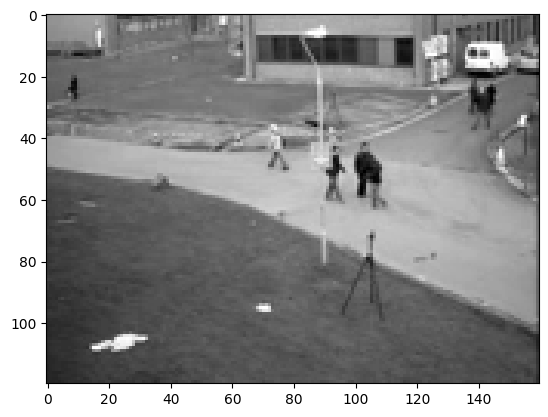

In [97]:
plt.imshow(np.reshape(data_matrix[:,23*fps], resized_shape), cmap='gray')

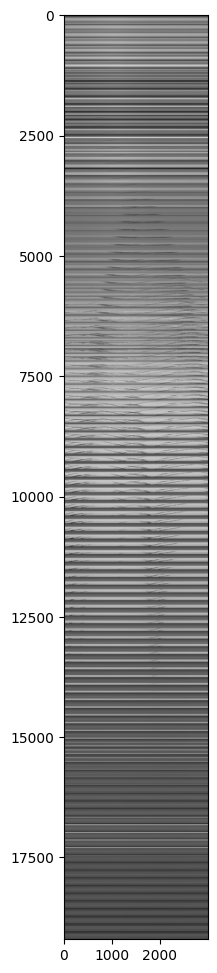

In [98]:
plt.figure(figsize=(12, 12))
plt.imshow(data_matrix, cmap='gray')

### PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
### Rascunho de PCA

# Example data (replace with your actual dataset)
X = np.array([[1, 5, 3],
              [4, 3, 6],
              [7, 8, 9],
              [30, 11, 12]])

# X = np.array([[1, 2],
#               [2, 5],
#               [3, 2],
#               [2, 3]])

# Standardize the data
# scaler.fit_transform(X) = (X-np.mean(X, axis=0))/np.std(X, axis=0)
# quando scaler = StandardScaler()
# no nosso caso apenas centralizaremos os dados, ou seja,
# não ocorrerá divisão pelo desvio padrão

scaler = StandardScaler(with_std=False) # Centraliza os dados
X_scaled = scaler.fit_transform(X)

rank = 2

# Initialize PCA with desired number of components
pca = PCA(n_components=rank) # Example: retaining 2 principal components

# Fit PCA to the scaled data
pca.fit(X_scaled)

components_matrix = pca.components_.T
print("PCA Components Matrix (Eigenvectors):\n", components_matrix, components_matrix.shape)


transformed_data = pca.transform(X_scaled).T
print("\nProjected Data (Transformed Data):\n", transformed_data, transformed_data.shape)


explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio of each component:\n", explained_variance)
print("Total Explained Variance Ratio: ", explained_variance.sum())

print("\n------------------------------------------------------------------")
print("\n X (scaled) = \n", X_scaled, X_scaled.shape)

X_PCA = components_matrix @ transformed_data
print(f"\n X (scaled) approx. by PCA{rank} = \n", X_PCA.T, X_PCA.T.shape)


print("\n X = \n", X, X.shape)

X_PCA_unscaled = scaler.inverse_transform(X_PCA.T)
print(f"\n X approx. by PCA{rank} (unscaled) = \n", X_PCA_unscaled, X_PCA_unscaled.shape)


PCA Components Matrix (Eigenvectors):
 [[ 0.94338565 -0.33166485]
 [ 0.21989315  0.63591201]
 [ 0.24833551  0.69686035]] (3, 2)

Projected Data (Transformed Data):
 [[-10.46448644  -7.32910927  -2.65448007  20.44807578]
 [ -1.09790149  -1.27413902   3.00100751  -0.628967  ]] (2, 4)

Explained Variance Ratio of each component:
 [0.96974271 0.02015734]
Total Explained Variance Ratio:  0.9899000416685045

------------------------------------------------------------------

 X (scaled) = 
 [[-9.5  -1.75 -4.5 ]
 [-6.5  -3.75 -1.5 ]
 [-3.5   1.25  1.5 ]
 [19.5   4.25  4.5 ]] (4, 3)

 X (scaled) approx. by PCA2 = 
 [[-9.50791098 -2.99923759 -3.36378757]
 [-6.49158936 -2.4218612  -2.70797503]
 [-3.49952711  1.32467474  1.43208148]
 [19.49902746  4.09642404  4.63968112]] (4, 3)

 X = 
 [[ 1  5  3]
 [ 4  3  6]
 [ 7  8  9]
 [30 11 12]] (4, 3)

 X approx. by PCA2 (unscaled) = 
 [[ 0.99208902  3.75076241  4.13621243]
 [ 4.00841064  4.3281388   4.79202497]
 [ 7.00047289  8.07467474  8.93208148]
 [29.

In [16]:
def get_PCA_approx(A, rank):

  scaler = StandardScaler(with_std=False) # centralizes the data
  A_scaled = scaler.fit_transform(A)

  # Initialize PCA with desired number of components
  pca = PCA(n_components=rank)

  # Fit PCA to the scaled data
  pca.fit(A_scaled)

  components_matrix = pca.components_.T # B
  projections_matrix = pca.transform(A_scaled).T # C
  # A ≈ BC

  A_PCA = components_matrix @ projections_matrix
  A_PCA_unscaled = scaler.inverse_transform(A_PCA.T)

  return A_PCA_unscaled, pca

A = X
print(A)
A_by_PCA, A_pca_object = get_PCA_approx(A, np.min(A.shape))

print()
print(A_by_PCA, np.linalg.norm(A-A_by_PCA)<1e-10)



[[ 1  5  3]
 [ 4  3  6]
 [ 7  8  9]
 [30 11 12]]

[[ 1.  5.  3.]
 [ 4.  3.  6.]
 [ 7.  8.  9.]
 [30. 11. 12.]] True


In [99]:
# Voltando a nossa imagem...

D = data_matrix

# vamos calcular a aproximação de rank 1
D_PCA, D_pca_object = get_PCA_approx(D, 1)



array([[[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 86,  67,  51],
        [ 72,  54,  35],
        [ 67,  49,  30]],

       [[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 50,  31,  15],
        [ 67,  49,  30],
        [ 71,  53,  34]],

       [[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 58,  39,  23],
        [ 76,  58,  39],
        [ 74,  56,  37]],

       ...,

       [[ 28,  42,   0],
        [ 33,  47,   0],
        [ 36,  50,   2],
        ...,
        [ 62,  75,  21],
        [ 43,  56,   2],
        [ 39,  52,   0]],

       [[ 29,  43,   0],
        [ 32,  46,   0],
        [ 33,  47,   0],
        ...,
        [ 64,  77,  23],
        [ 46,  59,   5],
        [ 43,  56,   2]],

       [[ 39,  53,   5],
        [ 40,  54,   6],
        [ 38,  52,   4],
        ...,
        [ 63,  76,  22],
        [ 47,  60,   6],
        [ 44,  57,   3]]], dtype=uint8)
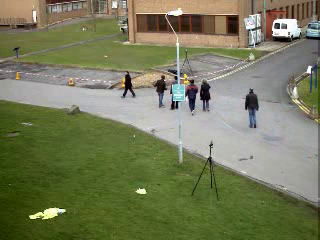

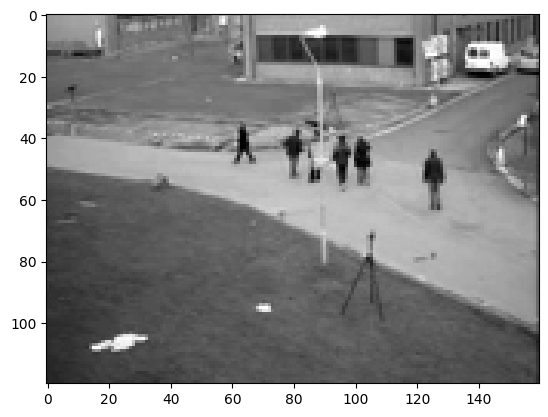

In [100]:
plt.imshow(np.reshape(D[:,10*fps], resized_shape), cmap='gray')
video.get_frame(10)

# Porque o PCA é interessante para imagens?

Fonte: [Calculating Explained Variance and minimum number of principal components](https://dataknowsall.com/blog/imagepca.html)

Cumutalive Explained Variance (rank 1 to 10): 
 [37.4 58.  71.  77.  80.8 83.6 86.  87.6 89.1 90.2]

Number of components explaining 95% variance: 16




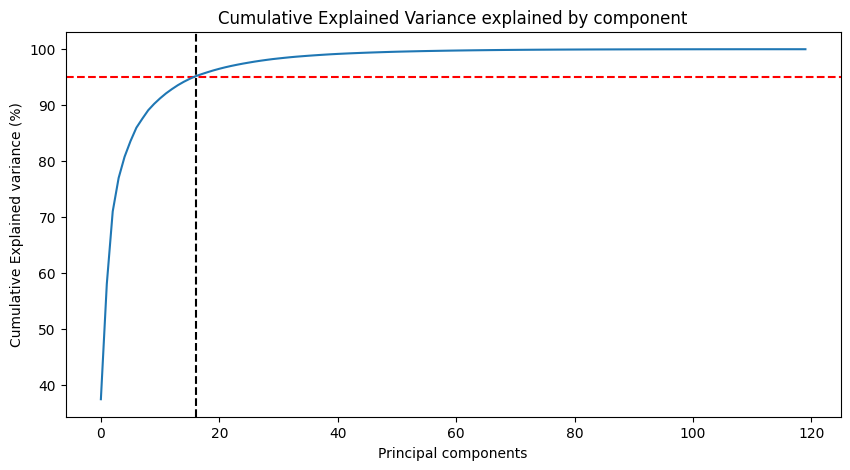

In [101]:
pca = PCA()
pca.fit(np.reshape(D[:,10*fps], resized_shape)) # para um frame
# pca.fit(D) # para o vídeo todo

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

print("Cumutalive Explained Variance (rank 1 to 10): \n", np.round(var_cumu[:10], decimals=1))

# How many PCs explain p% of the variance?

percentage_of_variance = 95

k = np.argmax(var_cumu >= percentage_of_variance)
print("\nNumber of components explaining 95% variance: "+ str(k))
print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=percentage_of_variance, color="r", linestyle="--")
ax = plt.plot(var_cumu)

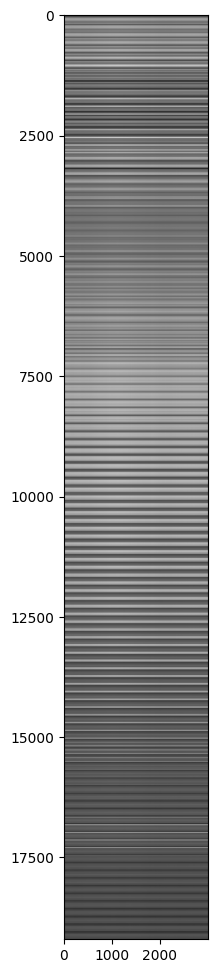

In [102]:
# D_PCA equivale ao fundo da imagem
plt.figure(figsize=(12, 12))
plt.imshow(D_PCA, cmap='gray')

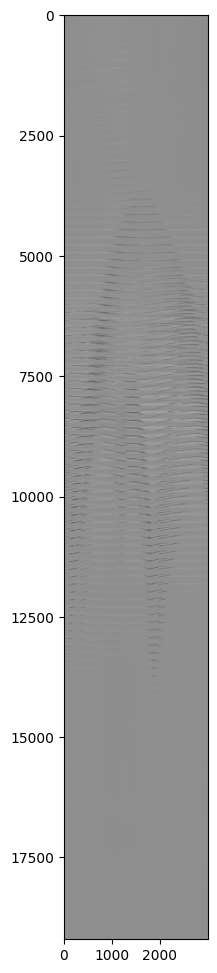

In [103]:
# (data_matrix - D_PCA) equivale à matriz de dados (imagem) menos o fundo (D_PCA)
plt.figure(figsize=(12, 12))
plt.imshow(data_matrix-D_PCA, cmap='gray')

array([[[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 86,  67,  51],
        [ 72,  54,  35],
        [ 67,  49,  30]],

       [[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 50,  31,  15],
        [ 67,  49,  30],
        [ 71,  53,  34]],

       [[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 58,  39,  23],
        [ 76,  58,  39],
        [ 74,  56,  37]],

       ...,

       [[ 28,  42,   0],
        [ 33,  47,   0],
        [ 36,  50,   2],
        ...,
        [ 62,  75,  21],
        [ 43,  56,   2],
        [ 39,  52,   0]],

       [[ 29,  43,   0],
        [ 32,  46,   0],
        [ 33,  47,   0],
        ...,
        [ 64,  77,  23],
        [ 46,  59,   5],
        [ 43,  56,   2]],

       [[ 39,  53,   5],
        [ 40,  54,   6],
        [ 38,  52,   4],
        ...,
        [ 63,  76,  22],
        [ 47,  60,   6],
        [ 44,  57,   3]]], dtype=uint8)
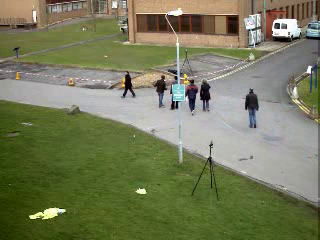

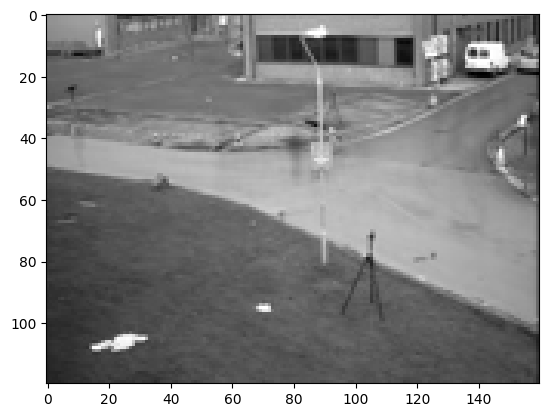

In [104]:
plt.imshow(np.reshape(D_PCA[:,10*fps], resized_shape), cmap='gray')
video.get_frame(10)

# Resultado: apenas o background da imagem, sem as pessoas

(19200, 3000)


array([[[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 86,  67,  51],
        [ 72,  54,  35],
        [ 67,  49,  30]],

       [[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 50,  31,  15],
        [ 67,  49,  30],
        [ 71,  53,  34]],

       [[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 58,  39,  23],
        [ 76,  58,  39],
        [ 74,  56,  37]],

       ...,

       [[ 28,  42,   0],
        [ 33,  47,   0],
        [ 36,  50,   2],
        ...,
        [ 62,  75,  21],
        [ 43,  56,   2],
        [ 39,  52,   0]],

       [[ 29,  43,   0],
        [ 32,  46,   0],
        [ 33,  47,   0],
        ...,
        [ 64,  77,  23],
        [ 46,  59,   5],
        [ 43,  56,   2]],

       [[ 39,  53,   5],
        [ 40,  54,   6],
        [ 38,  52,   4],
        ...,
        [ 63,  76,  22],
        [ 47,  60,   6],
        [ 44,  57,   3]]], dtype=uint8)
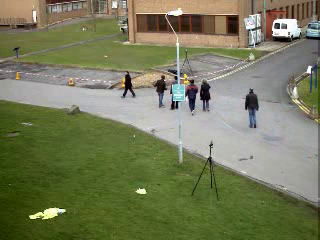

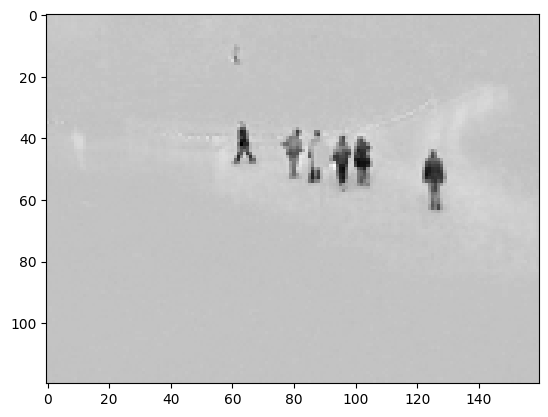

In [105]:
print(D_PCA.shape)

position = 10 # seconds

D_minus_bg = D-D_PCA # imagem - background = pessoas
D_minus_bg += abs(D_minus_bg.min()) # correção para que os valores de grayscale não fiquem negativos e estejam entre 0 e 255
# D_minus_bg = np.round(D_minus_bg, 0)

people = D_minus_bg[:,position*fps]
people_unflattened = np.reshape(people, resized_shape)

plt.imshow(people_unflattened, cmap='gray')
video.get_frame(position)

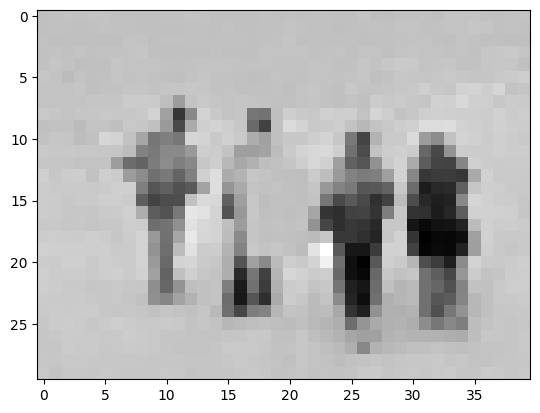

In [106]:
zoomed_people = np.reshape(people, resized_shape)[30:60,70:110] # zoom on the people
zoomed_background = np.reshape(people, resized_shape)[80:100,80:100] # zoom on the void

plt.imshow(zoomed_people, cmap='gray')

[[211.33900538 211.49286209 214.42976647 213.96435367 212.15322739
  214.41677879 213.9710386  215.6387561  215.26750346]
 [214.07951853 214.1605689  219.18634967 219.83578075 218.35932962
  208.16206119 178.86023015 212.30609545 217.34657335]
 [216.73641302 216.09362737 215.7481349  217.42248224 225.60732013
  182.49598275  88.73199814 160.50064165 226.37897214]
 [213.47111453 208.61851241 216.73942964 214.95455679 209.46802289
  175.96982427 105.61954231 191.04395812 222.92559714]
 [228.88171382 225.42925019 211.20442184 186.58848159 144.55492589
  152.6611053  145.27057703 229.37932666 227.13631259]
 [214.81929015 214.04551986 205.94492509 154.84812996 147.59321039
  161.13213683 161.15966876 175.84186768 222.34782444]
 [212.68904896 179.26813962 136.19853487 128.18241328 149.84687416
  163.76556096 152.27283835 160.85658364 216.19536252]
 [221.91853786 219.82134489 178.16981121 163.59218772 139.19034845
  148.08545974 128.60467585 153.9015737  223.57102249]
 [219.16979971 223.24974

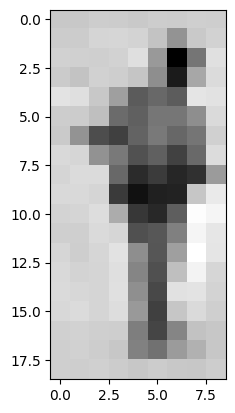

In [107]:
person = zoomed_people[6:25,5:14]
print(person)
plt.imshow(person, cmap='gray')

# Segmentando as pessoas na imagem e obtendo suas posições

(array([1.7000e+01, 4.5000e+01, 6.4000e+01, 6.0000e+01, 7.2000e+01,
        7.4000e+01, 8.7000e+01, 1.7431e+04, 1.3460e+03, 4.0000e+00]),
 array([ 30.87597549,  54.36212452,  77.84827355, 101.33442257,
        124.8205716 , 148.30672063, 171.79286966, 195.27901868,
        218.76516771, 242.25131674, 265.73746576]),
 <BarContainer object of 10 artists>)

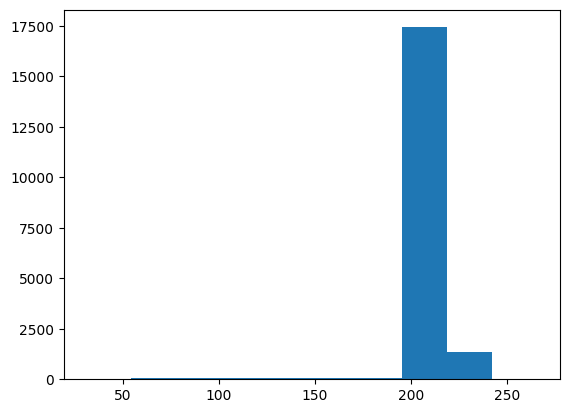

In [108]:
# Vamos observar a dispersão dos valores de grayscale:

plt.hist(people)

In [115]:
q_percentage = 0.02
q_left, q_right = np.quantile(people, q_percentage), np.quantile(people, 1-q_percentage)
people_grayscale = people[(people < q_left)] #  | (people > q_right)

q_left, q_right, np.sort(people_grayscale)

(np.float64(186.8611924858287),
 np.float64(224.10723098410244),
 array([ 30.87597549,  40.30521277,  42.68873366,  44.61882164,
         47.03376952,  47.20045678,  47.74045969,  47.81340957,
         47.85531352,  48.90461069,  49.16056303,  50.1875152 ,
         52.18981573,  52.9842675 ,  53.49093161,  53.99231068,
         54.2066313 ,  55.26724357,  55.99640267,  56.95624105,
         57.66500874,  58.3156241 ,  58.52507473,  59.40322244,
         59.9633433 ,  60.74770554,  60.81144492,  61.04627439,
         62.10534458,  64.42623006,  65.04265375,  65.13625134,
         65.50948463,  66.29554963,  66.92923157,  67.25058528,
         67.28151477,  67.5441031 ,  68.00583702,  69.06354286,
         69.56171277,  69.58521843,  69.61345141,  69.71521343,
         70.38198716,  70.65908248,  71.89292341,  72.01106553,
         72.66121466,  73.04562957,  73.15915741,  73.46383471,
         73.64113238,  74.89669419,  75.28373861,  75.47102711,
         75.64298968,  76.15469491,  76

Coordenadas dos pontos das pessoas:  [array([11, 61]), array([14, 61]), array([15, 61]), array([15, 62]), array([16, 61]), array([16, 62]), array([35, 63]), array([36, 63]), array([36, 64]), array([37, 63]), array([37, 64]), array([37, 81]), array([38, 62]), array([38, 63]), array([38, 64]), array([38, 65]), array([38, 80]), array([38, 81]), array([38, 82]), array([38, 87]), array([38, 88]), array([39, 62]), array([39, 63]), array([39, 64]), array([39, 65]), array([39, 80]), array([39, 81]), array([39, 87]), array([39, 88]), array([40, 62]), array([40, 63]), array([40, 64]), array([40, 65]), array([40, 78]), array([40, 79]), array([40, 80]), array([40, 81]), array([40, 88]), array([40, 95]), array([40, 96]), array([ 40, 101]), array([ 40, 102]), array([41, 62]), array([41, 63]), array([41, 64]), array([41, 65]), array([41, 78]), array([41, 79]), array([41, 80]), array([41, 81]), array([41, 82]), array([41, 86]), array([41, 87]), array([41, 88]), array([41, 95]), array([41, 96]), array(

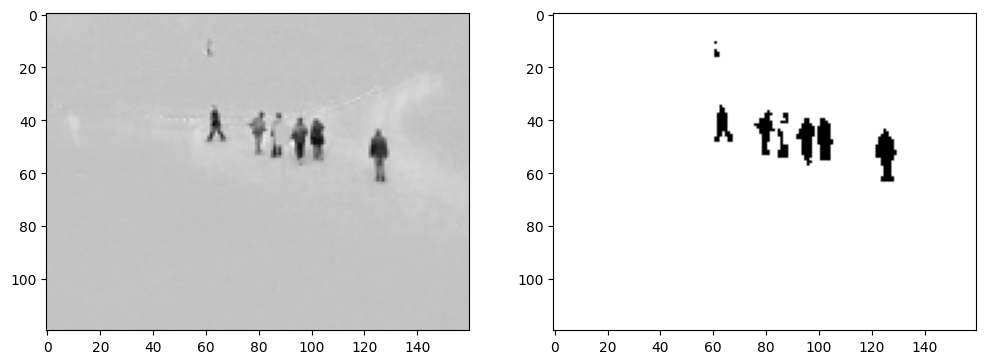

array([[[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 86,  67,  51],
        [ 72,  54,  35],
        [ 67,  49,  30]],

       [[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 50,  31,  15],
        [ 67,  49,  30],
        [ 71,  53,  34]],

       [[175, 143, 109],
        [176, 144, 110],
        [175, 143, 109],
        ...,
        [ 58,  39,  23],
        [ 76,  58,  39],
        [ 74,  56,  37]],

       ...,

       [[ 28,  42,   0],
        [ 33,  47,   0],
        [ 36,  50,   2],
        ...,
        [ 62,  75,  21],
        [ 43,  56,   2],
        [ 39,  52,   0]],

       [[ 29,  43,   0],
        [ 32,  46,   0],
        [ 33,  47,   0],
        ...,
        [ 64,  77,  23],
        [ 46,  59,   5],
        [ 43,  56,   2]],

       [[ 39,  53,   5],
        [ 40,  54,   6],
        [ 38,  52,   4],
        ...,
        [ 63,  76,  22],
        [ 47,  60,   6],
        [ 44,  57,   3]]], dtype=uint8)
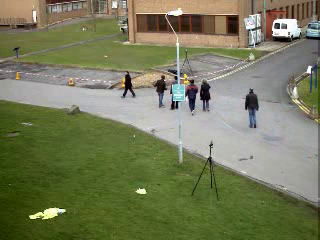

In [116]:
# Pego as coordenadas dos valores de grayscale relativos às pessoas no frame (posição=10s)
people_coordinates = [np.array(np.where(people_unflattened == p_g)).flatten() for p_g in people_grayscale]
print("Coordenadas dos pontos das pessoas: ",people_coordinates)

# people_coordinates = []

# for p_g in people_grayscale:
#   row_indices, col_indices = np.where(people_unflattened == p_g)
#   people_coordinates.append( zip(row_indices, col_indices) )
# print("Coordenadas dos pontos das pessoas: ", people_coordinates)

canvas = np.zeros(people_unflattened.shape)+255

for m, n in people_coordinates:
  canvas[m,n] = 0 # pinta de preto todos os pontos onde há pessoas

plt.figure(figsize=(12, 16))

plt.subplot(1, 2, 1)
plt.imshow(people_unflattened, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(canvas, cmap='gray')

plt.show()

video.get_frame(10)

# Criando vídeo com o fundo removido

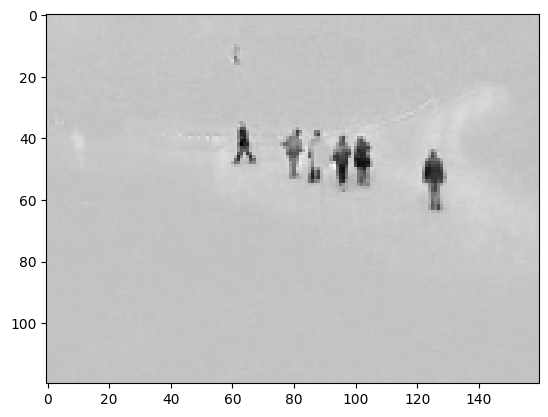

In [117]:
# Criando o array de frames sem background
D_minus_bg_unflattened = np.array([np.resize(flattened_frame, resized_shape) for flattened_frame in D_minus_bg.T])
D_minus_bg_unflattened = (D_minus_bg_unflattened+abs(D_minus_bg_unflattened.min())).astype(np.int32)

plt.imshow(D_minus_bg_unflattened[10*fps], cmap='gray')

In [118]:
import cv2

def create_video_from_frame_array(frame_array, fps, video_name):
  height, width = frame_array[0].shape
  duration = int(len(frame_array)/fps) # seconds

  out = cv2.VideoWriter(video_name+'.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height), False)
  for t in range(fps*duration):
    data = np.uint8(frame_array[t])
    out.write(data)
  out.release()

create_video_from_frame_array(D_minus_bg_unflattened, fps, 'v2_minus_bg')

processed_video = mpe.VideoFileClip("v2_minus_bg.mp4")
v1_minus_bg = processed_video.subclip(0,processed_video.duration)
v1 = video.subclip(0,video.duration)
v1 = v1.resize(resize_prctg/100)

final_clip = mpe.clips_array([[v1_minus_bg, v1]])

final_clip.ipython_display(width = 800)



t:   0%|          | 3/1002 [10:49<00:50, 19.89it/s, now=None]

t:   0%|          | 3/1002 [10:49<00:50, 19.89it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4





t:   0%|          | 3/1002 [10:53<00:50, 19.89it/s, now=None]

t:   0%|          | 3/1002 [10:53<00:50, 19.89it/s, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [ ]:
# Vamos tentar criar vídeo com canvas branco e somente pixels pretos nas coordenadas dos pixels das pessoas

q_percentage = 0.02
q_left, q_right = np.quantile(people, q_percentage), np.quantile(people, 1-q_percentage)
people_grayscale = people[(people < q_left)] #  | (people > q_right)

q_left, q_right, np.sort(people_grayscale)

# Pego as coordenadas dos valores de grayscale relativos às pessoas no frame (posição=10s)
# people_coordinates = [np.array(np.where(people_unflattened == p_g)).flatten() for p_g in people_grayscale]
# print("Coordenadas dos pontos das pessoas: ",people_coordinates)

# canvas = np.zeros(people_unflattened.shape)+255

# for m, n in people_coordinates:
#   canvas[m,n] = 0 # pinta de preto todos os pontos onde há pessoas


(np.float64(186.83016408883523),
 np.float64(224.07026504180632),
 array([ 30.75797444,  40.29398686,  42.66665419,  44.60218778,
         46.98319275,  47.16114582,  47.68686341,  47.72555961,
         47.8179193 ,  48.87402201,  49.05236504,  50.12467946,
         52.12517548,  52.9336377 ,  53.45565313,  53.94993143,
         54.14488362,  55.22722783,  55.99142   ,  56.88069228,
         57.65094746,  58.28128244,  58.47967148,  59.4551591 ,
         59.92530305,  60.69675384,  60.77347109,  60.96512475,
         62.00964985,  64.37236245,  65.01123305,  65.06648301,
         65.45498513,  66.22574229,  66.89537347,  67.20604335,
         67.27412061,  67.46632116,  67.92457143,  69.00299802,
         69.49769942,  69.55380624,  69.55935741,  69.67513049,
         70.30917222,  70.61315831,  71.85730854,  71.89987193,
         72.70113258,  73.00728013,  73.1295486 ,  73.41249193,
         73.65192382,  74.93421533,  75.2227147 ,  75.49583956,
         75.57639572,  76.12754266,  7

(np.float64(192.0),
 np.float64(226.0),
 (array([  0,   5,   8,  10,  11,  12,  14,  15,  16,  17,  18,  19,  20,
          21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
          34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
          47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
          60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
          73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
          86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
          99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
         125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
         138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
         151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
         164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176

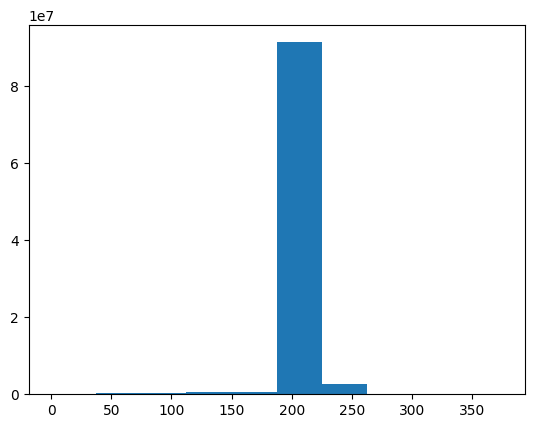

In [ ]:
D_minus_bg_flattened = D_minus_bg_unflattened.flatten()
plt.hist(D_minus_bg_flattened)

q_percentage = 0.02
q_left, q_right = np.quantile(D_minus_bg_flattened, q_percentage), np.quantile(D_minus_bg_flattened, 1-q_percentage)
people_grayscale = D_minus_bg_flattened[(D_minus_bg_flattened < q_left)] #  | (people > q_right)

q_left, q_right, np.unique(people_grayscale, return_counts=True)